In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from matplotlib.colors import ListedColormap

In [3]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10

(10.0, 70.0, 1.0, 7.0)

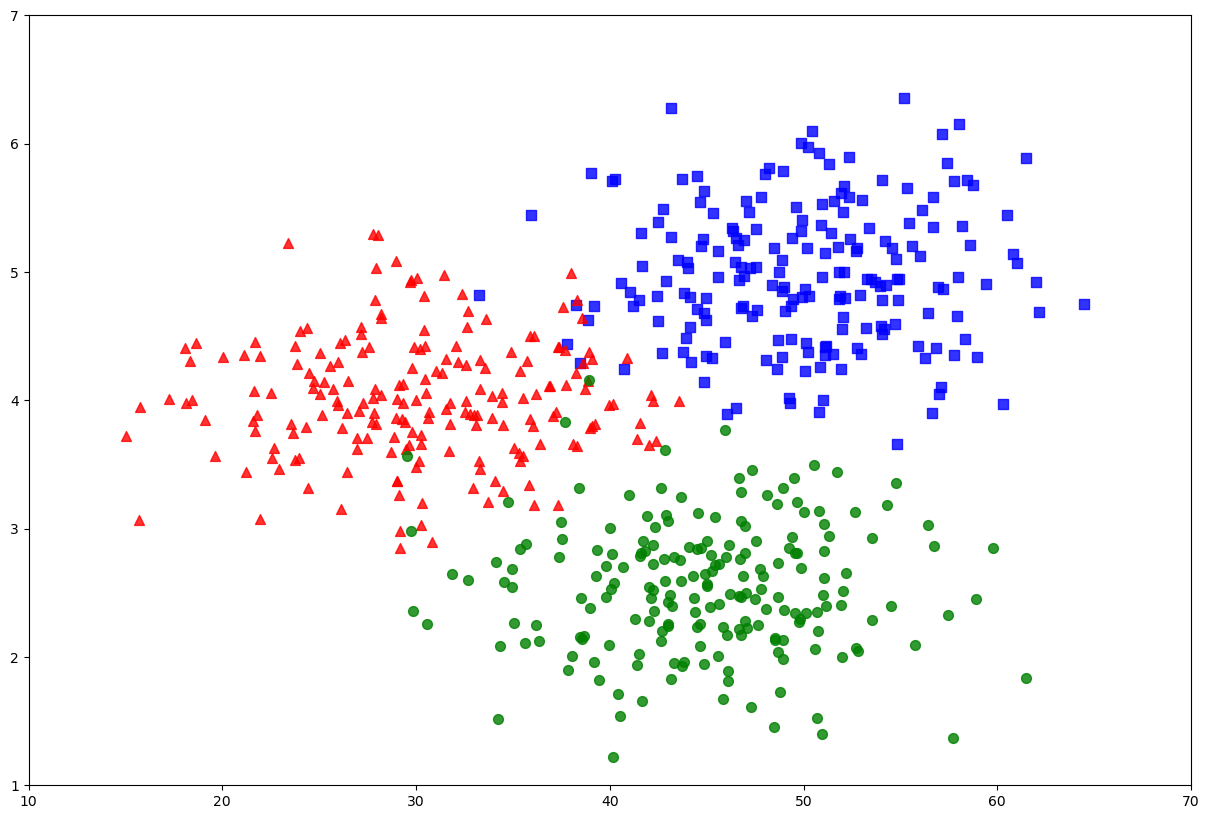

In [4]:
x1 = np.random.normal(50, 6, 200)
y1 = np.random.normal(5, 0.5, 200)
plt.scatter(x1, y1, c='b', marker='s', s=50, alpha=0.8)

x2 = np.random.normal(30, 6, 200)
y2 = np.random.normal(4, 0.5, 200)
plt.scatter(x2, y2, c='r', marker='^', s=50, alpha=0.8)

x3 = np.random.normal(45, 6, 200)
y3 = np.random.normal(2.5, 0.5, 200)
plt.scatter(x3, y3, c='g', s=50, alpha=0.8)

plt.axis((10, 70,1,7))

In [5]:
x_val = np.concatenate((x1,x2,x3))
y_val = np.concatenate((y1,y2,y3))

In [6]:
x_diff = max(x_val)-min(x_val)
y_diff = max(y_val)-min(y_val)

In [7]:
x_normalized = x_val/x_diff
y_normalized = y_val/y_diff
xy_normalized = np.array(list(zip(x_normalized,y_normalized)))

In [8]:
labels = [1]*200+[2]*200+[3]*200

In [9]:
clf = neighbors.KNeighborsClassifier(30)

In [10]:
clf.fit(xy_normalized, labels)

KNeighborsClassifier(n_neighbors=30)

In [11]:
nearests = clf.kneighbors([(50/x_diff, 5/y_diff),(30/x_diff, 3/y_diff)], 5, False)
nearests

array([[ 35,  22, 125, 194, 131],
       [525, 382, 338, 337, 354]], dtype=int64)

In [13]:
prediction = clf.predict([(50/x_diff, 5/y_diff),(30/x_diff, 3/y_diff)])
prediction

array([1, 2])

In [14]:
prediction_proba = clf.predict_proba([(50/x_diff, 5/y_diff),(30/x_diff, 3/y_diff)])
prediction_proba

array([[1.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333]])

In [15]:
x1_test = np.random.normal(50, 6, 100)
y1_test = np.random.normal(5, 0.5, 100)

x2_test = np.random.normal(30,6,100)
y2_test = np.random.normal(4,0.5,100)

x3_test = np.random.normal(45,6,100)
y3_test = np.random.normal(2.5, 0.5, 100)

xy_test_normalized = np.array(list(zip(np.concatenate((x1_test,x2_test,x3_test))/x_diff,\
                        np.concatenate((y1_test,y2_test,y3_test))/y_diff)))

labels_test = [1]*100+[2]*100+[3]*100

In [16]:
score = clf.score(xy_test_normalized, labels_test)
score

0.9533333333333334

In [17]:
clf1 = neighbors.KNeighborsClassifier(1)
clf1.fit(xy_normalized, labels)
clf1.score(xy_test_normalized, labels_test)

0.9566666666666667

In [18]:
xx,yy = np.meshgrid(np.arange(1,70.1,0.1), np.arange(1,7.01,0.01))

In [19]:
xx_normalized = xx/x_diff
yy_normalized = yy/y_diff

In [20]:
coords = np.c_[xx_normalized.ravel(), yy_normalized.ravel()]

In [21]:
Z = clf.predict(coords)

In [22]:
Z = Z.reshape(xx.shape)

(10.0, 70.0, 1.0, 7.0)

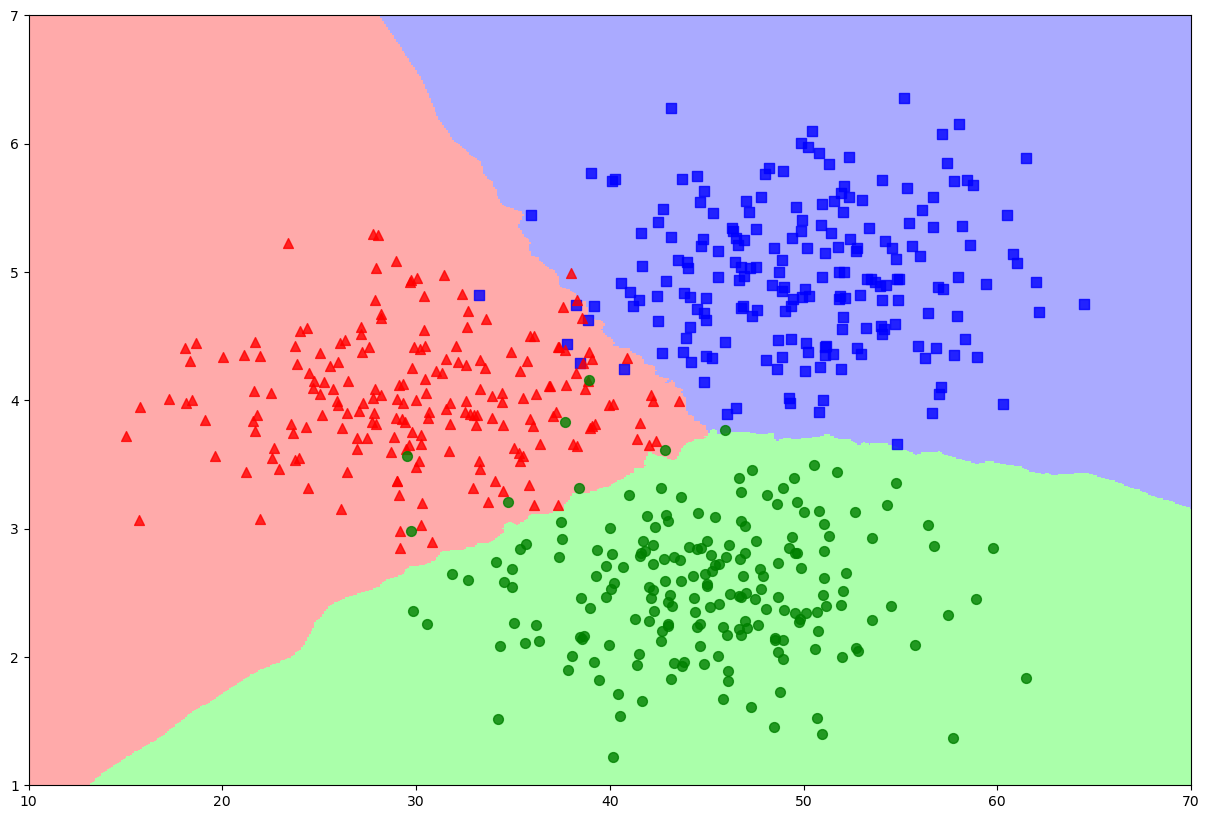

In [23]:
light_rgb = ListedColormap([ '#AAAAFF', '#FFAAAA','#AAFFAA'])
plt.pcolormesh(xx, yy,Z, cmap=light_rgb)
plt.scatter(x1,y1,c='b',marker='s',s=50,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=50, alpha=0.8)
plt.scatter(x3,y3, c='g', s=50, alpha=0.8)
plt.axis((10, 70,1,7))

In [24]:
Z_proba = clf.predict_proba(coords)

In [25]:
Z_proba_reds = Z_proba[:,1].reshape(xx.shape)

(10.0, 70.0, 1.0, 7.0)

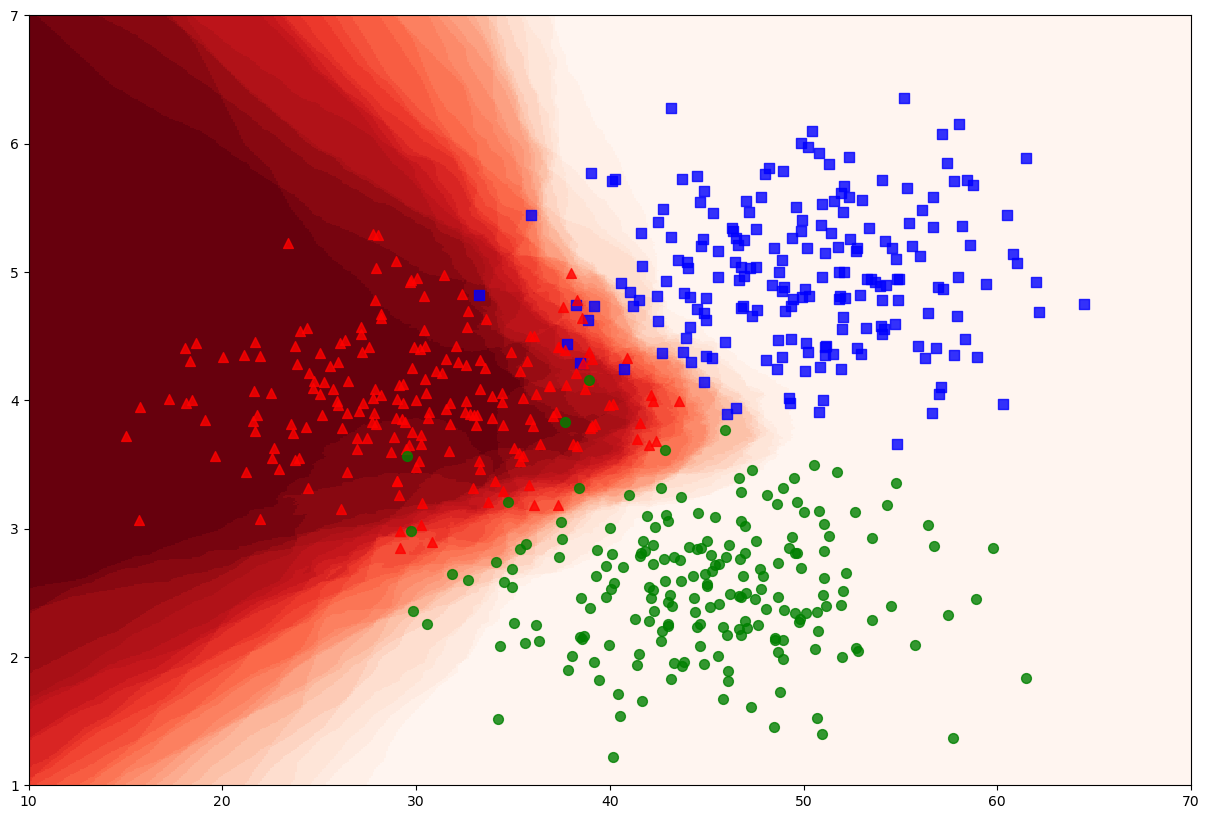

In [26]:
plt.pcolormesh(xx, yy,Z_proba_reds, cmap='Reds')
plt.scatter(x1,y1,c='b',marker='s',s=50,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=50, alpha=0.8)
plt.scatter(x3,y3, c='g', s=50, alpha=0.8)
plt.axis((10, 70,1,7))